<a href="https://colab.research.google.com/github/Hyuncastl/MACHINE_LEARNING/blob/main/8%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
import tensorflow as tfhub
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 2s 0us/step


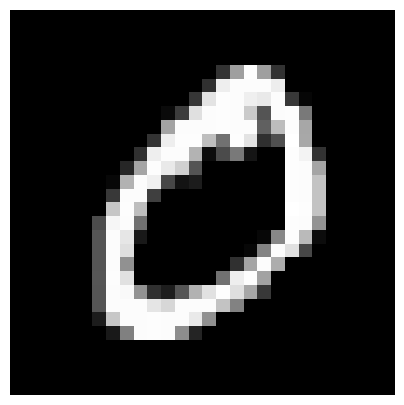

In [12]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_valid, y_valid) = mnist.load_data()

def plot_image(data,idx):
    plt.figure(figsize = (5,5))
    plt.imshow(data[idx],cmap = 'gray')
    plt.axis('off')
    plt.show()
plot_image(x_train,1)

In [13]:
print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0 255
0 255


In [14]:
x_train = x_train/x_train.max()
x_valid = x_valid/x_valid.max()

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train_in = x_train[...,tf.newaxis]
x_valid_in = x_valid[...,tf.newaxis]
print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [17]:
##Conv20,Kernel:3x3, name : 레이어 이름 conv, 활성화 함수: ReLU
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1),name = 'conv'),
                             tf.keras.layers.MaxPool2D((2,2),name = 'pool'),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train, validation_data = (x_valid, y_valid), epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.2068 - accuracy: 0.9414 - val_loss: 0.0777 - val_accuracy: 0.9772
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0754 - accuracy: 0.9782 - val_loss: 0.0615 - val_accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0572 - accuracy: 0.9834 - val_loss: 0.0562 - val_accuracy: 0.9802
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0481 - accuracy: 0.9859 - val_loss: 0.0540 - val_accuracy: 0.9816
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0504 - val_accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0503 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.0535 - val_accuracy

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.9814


[0.06291987746953964, 0.9814000129699707]

Text(0.5, 1.0, 'Accuracy')

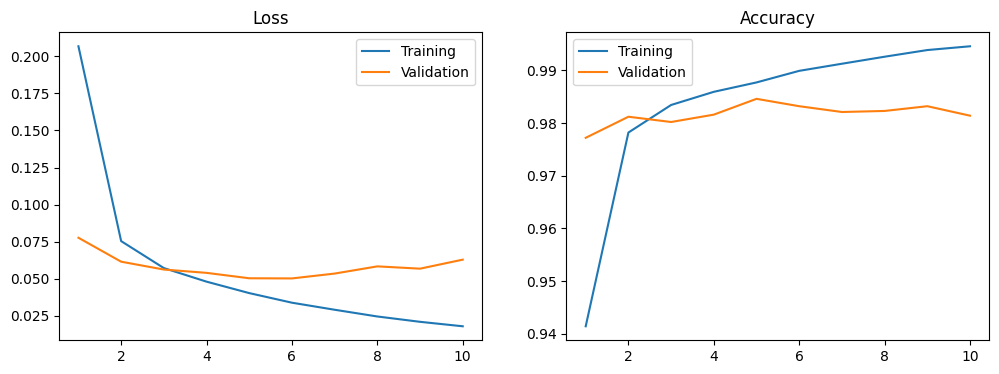

In [20]:
loss, val_loss = history.history['loss'],history.history['val_loss']
acc,val_acc = history.history['accuracy'],history.history['val_accuracy']
epoch = 10
fig,axes = plt.subplots(1,2,figsize = (12,4))
axes[0].plot(range(1,epoch +1),loss,label = 'Training')
axes[0].plot(range(1,epoch +1),val_loss,label = 'Validation')
axes[0].legend(loc='best')
axes[0].set_title('Loss')

axes[1].plot(range(1,epoch +1),acc,label = 'Training')
axes[1].plot(range(1,epoch +1),val_acc,label = 'Validation')
axes[1].legend(loc='best')
axes[1].set_title('Accuracy')

모델 구조 파악

1. 입력형태 (28,28,1)
2. 출력형태(10)
3. 첫번째 레이어 : 합성곱 Conv2D,가중치(weight)(3,3,1,32)3332 = 280개, 상수항 (bias)32/output(26,26,1,32)
4. 두번째 레이어 : Pooling(26,26,,32)
5. 세번째 레이어 : 1차 배열로 변환
6. 네번째 레이어 : 출력

In [21]:
#각 층에 대한 정보
model.layers

In [22]:
#첫번째 레이어 :Conv2D,가중치 : 3*3*32 = 280개
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-6.10242665e-01, -6.75318360e-01, -1.45914897e-01,
            6.11135840e-01, -1.83464307e-02,  2.74326175e-01,
           -7.03308642e-01,  1.74207821e-01, -5.02643704e-01,
            3.39037299e-01,  3.31848338e-02,  3.30563694e-01,
            6.77977383e-01,  5.85807487e-02, -6.76606297e-01,
            1.59241498e-01, -4.90594171e-02, -2.47612551e-01,
            5.92115410e-02, -5.88679731e-01, -1.50070697e-01,
            3.49016160e-01, -1.22414279e+00,  2.69273996e-01,
            2.26134822e-01,  1.47352859e-01,  2.36458272e-01,
            2.54630148e-01,  3.65289837e-01, -6.10316157e-01,
           -7.97614992e-01, -4.25943732e-01]],
 
         [[ 6.25367999e-01, -2.35115722e-01, -5.02167761e-01,
            3.02761663e-02,  6.95804739e-03,  4.44355756e-02,
            6.14794157e-02,  3.18577766e-01, -2.38084987e-01,
           -1.14601336e-01,  3.90748382e-01,  1.22748263e-01,
           

In [23]:
#첫번째 레이어 :Conv2D 상수항 : 32개
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.10558014, -0.1546148 , -0.06466959, -0.00619452, -0.19041519,
       -0.27629465, -0.07954374, -0.10961524, -0.02405714, -0.21819945,
       -0.2317793 , -0.31573147, -0.00764674, -0.26105714, -0.00395948,
       -0.25209695, -0.2487439 , -0.11966319, -0.0174775 ,  0.24108079,
       -0.15761247, -0.0454297 , -0.01533127, -0.22554646, -0.14469448,
       -0.21619476, -0.22187418, -0.19353366, -0.02714934, -0.10649665,
       -0.12710887, -0.01416811], dtype=float32)>

In [24]:
#첫번째 레이어의 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-6.10242665e-01, -6.75318360e-01, -1.45914897e-01,
           6.11135840e-01, -1.83464307e-02,  2.74326175e-01,
          -7.03308642e-01,  1.74207821e-01, -5.02643704e-01,
           3.39037299e-01,  3.31848338e-02,  3.30563694e-01,
           6.77977383e-01,  5.85807487e-02, -6.76606297e-01,
           1.59241498e-01, -4.90594171e-02, -2.47612551e-01,
           5.92115410e-02, -5.88679731e-01, -1.50070697e-01,
           3.49016160e-01, -1.22414279e+00,  2.69273996e-01,
           2.26134822e-01,  1.47352859e-01,  2.36458272e-01,
           2.54630148e-01,  3.65289837e-01, -6.10316157e-01,
          -7.97614992e-01, -4.25943732e-01]],

        [[ 6.25367999e-01, -2.35115722e-01, -5.02167761e-01,
           3.02761663e-02,  6.95804739e-03,  4.44355756e-02,
           6.14794157e-02,  3.18577766e-01, -2.38084987e-01,
          -1.14601336e-01,  3.90748382e-01,  1.22748263e-01,
          -1.49440539e+00,  

In [25]:
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.10558014, -0.1546148 , -0.06466959, -0.00619452, -0.19041519,
       -0.27629465, -0.07954374, -0.10961524, -0.02405714, -0.21819945,
       -0.2317793 , -0.31573147, -0.00764674, -0.26105714, -0.00395948,
       -0.25209695, -0.2487439 , -0.11966319, -0.0174775 ,  0.24108079,
       -0.15761247, -0.0454297 , -0.01533127, -0.22554646, -0.14469448,
       -0.21619476, -0.22187418, -0.19353366, -0.02714934, -0.10649665,
       -0.12710887, -0.01416811], dtype=float32)>

In [26]:
#Conv2D 레이어 이름으로 소환하기
model.get_layer('conv')

In [27]:
#Conv2D와Pooling 레이어의 output(이미지)출력
#모델 만들기 : tf.keras.model(입력 = 입력 데이터 , 출력 = 첫번째, 두번째층의 출력)
#모델 예측 : 모델명.predict()
activator = tf.keras.Model(inputs = model.input,outputs = [layer.output for layer in model.layers[:2]] )

In [28]:
#입력데이터 첫번째 5에 대해 출력
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)
#conv2D층과 Pooling층의 output 이므로 '2'라는 결과

1/1 [==============================] - 0s 99ms/step


2

In [29]:
#activation[0]
conv = activations[0]
conv.shape

(1, 26, 26, 32)

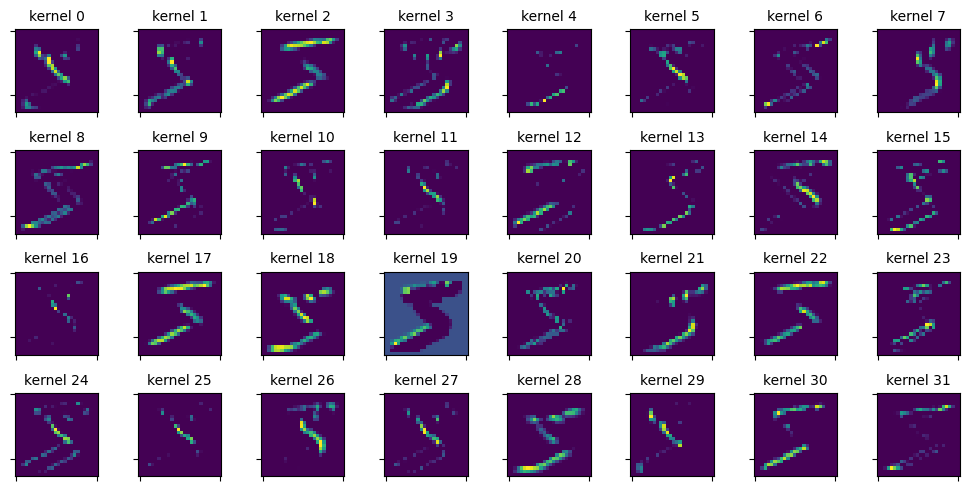

In [30]:
#'5'의 첫번째 Canv2D를 통과한 32개 kernel별 특성 맵 시각화
#Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10,5)

for i in range(32):
    ax = axes[i//8, i%8]
    ax.imshow(conv[0,:, :, i], cmap = 'viridis')
    ax.set_title('kernel %s'%str(i), fontsize = 10)
    plt.setp(axes[i//8,i%8].get_xticklabels(),visible = False)
    plt.setp(axes[i//8,i%8].get_yticklabels(),visible = False)

plt.tight_layout()
plt.show()  

In [31]:
#activations
pooling = activations[1]
pooling.shape

(1, 13, 13, 32)

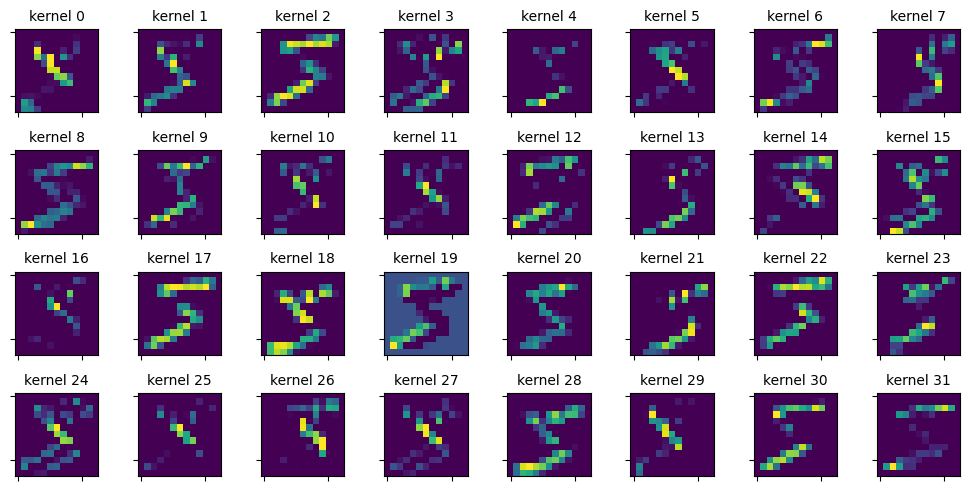

In [32]:
#'5'의 두번째 pooling를 통과한 32개 kernel별 특성맵 시각화
#pooling 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10,5)

for i in range(32):
    ax = axes[i//8, i%8]
    ax.imshow(pooling[0,:, :, i], cmap = 'viridis')
    ax.set_title('kernel %s'%str(i), fontsize = 10)
    plt.setp(axes[i//8,i%8].get_xticklabels(),visible = False)
    plt.setp(axes[i//8,i%8].get_yticklabels(),visible = False)

plt.tight_layout()
plt.show()

경로탐색

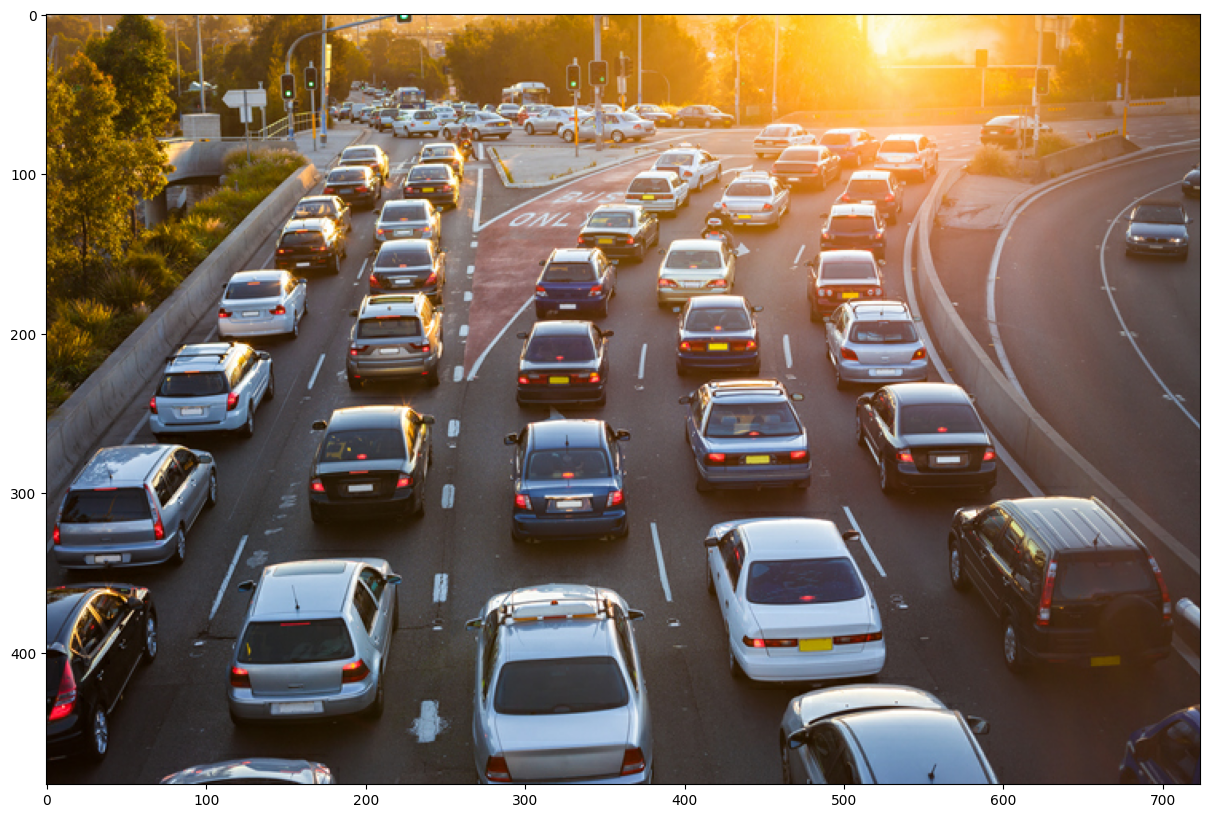

In [33]:
img_path = 'https://blogfiles.pstatic.net/MjAyMDA4MjZfNDIg/MDAxNTk4NDI1NDQxMDM5.zctD5BDCigKP-iN_QqWJhAfRu2kIVvPqf1GTOLxxlmcg.2nTuyc65hS67gs7U4YcIa-aQghWH2tMndpE2LtvnfBog.JPEG.koti10/GettyImages-159406920.jpg'
img = tf.keras.utils.get_file(fname='gangnam',origin=img_path)
img = tf.io.read_file(img)  #파일 객체를 string으로 변환
img = tf.image.decode_jpeg(img,channels=3) #문자를 숫자 텐서로 변환
img = tf.image.convert_image_dtype(img,tf.float32)  #0~1 범위로 정규화

plt.figure(figsize=(15,10))
plt.imshow(img)

In [34]:
img.shape

TensorShape([483, 724, 3])

In [35]:
img_input = tf.expand_dims(img,0) # batch_size 추가. 4차원 텐서로 입력
img_input.shape

TensorShape([1, 483, 724, 3])

In [2]:
import tensorflow as tfhub

In [4]:
import tensorflow as tf
import tensorflow_hub as hub

model = hub.load("https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1")

In [5]:
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7F5953C51BD0>}))

In [6]:
obj_detector = model.signatures['default']
obj_detector

<ConcreteFunction pruned(images) at 0x7F5953C51BD0>

In [36]:
result = obj_detector(img_input)
result.keys()

dict_keys(['detection_boxes', 'detection_class_entities', 'detection_class_labels', 'detection_class_names', 'detection_scores'])

In [37]:
type(result)

dict

In [39]:
boxes = result["detection_boxes"]
labels = result["detection_class_labels"]
scores = result["detection_scores"]

In [40]:
len(result["detection_scores"])

100

In [41]:
type(result)

dict

In [45]:
for key, value in result.items():
    print(key, value)

detection_boxes tf.Tensor(
[[0.72237843 0.3638495  1.         0.5283518 ]
 [0.1765128  0.24138744 0.2475204  0.29608655]
 [0.62663573 0.77729475 0.8634053  0.97981024]
 [0.72918385 0.         0.97706425 0.1019135 ]
 [0.46722168 0.55289406 0.6197708  0.66313505]
 [0.47668403 0.6980032  0.63048124 0.8247278 ]
 [0.1753155  0.31047893 0.25202826 0.36051804]
 [0.50170463 0.22716302 0.65888786 0.33539456]
 [0.85980827 0.62952864 0.99812555 0.8328557 ]
 [0.5198469  0.40065792 0.68683755 0.50871676]
 [0.2271415  0.20128025 0.32593662 0.26349106]
 [0.5566426  0.00780419 0.7322474  0.15057209]
 [0.70549166 0.15605034 0.9259619  0.30751643]
 [0.9610486  0.09817649 1.         0.25030893]
 [0.42652944 0.09160674 0.5481191  0.20010138]
 [0.65065634 0.5715992  0.8744034  0.725307  ]
 [0.32548666 0.14553964 0.42096975 0.2321179 ]
 [0.3886397  0.40603104 0.5101716  0.48875117]
 [0.34786215 0.25633833 0.48122728 0.34463236]
 [0.16559719 0.2519113  0.21228242 0.29845122]
 [0.35839802 0.5431313  0.4679556

In [47]:
labels = result["detection_class_entities"]
names = result["detection_class_names"]

In [49]:
boxes = result["detection_boxes"]
labels = result["detection_class_labels"]
scores = result["detection_scores"]

0.9164053797721863 : (348.9087829589844,263.4270324707031,483.0,382.5267028808594)
0.9134544134140015 : (85.25567626953125,174.76451110839844,119.55235290527344,214.36666870117188)
0.9044370055198669 : (302.6650695800781,562.7614135742188,417.0247497558594,709.3826293945312)
0.8795121312141418 : (352.19580078125,0.0,471.9220275878906,73.78536987304688)
0.8621375560760498 : (225.66807556152344,400.2952880859375,299.34930419921875,480.1097717285156)
0.8513588905334473 : (230.23838806152344,505.35430908203125,304.5224304199219,597.1029052734375)
0.8458320498466492 : (84.67738342285156,224.7867431640625,121.72964477539062,261.0150451660156)
0.8446541428565979 : (242.32333374023438,164.4660186767578,318.2428283691406,242.82566833496094)
0.8210684657096863 : (415.2873840332031,455.77874755859375,482.0946350097656,602.987548828125)
0.8140767216682434 : (251.0860595703125,290.0763244628906,331.7425537109375,368.3109436035156)


AttributeError: ignored

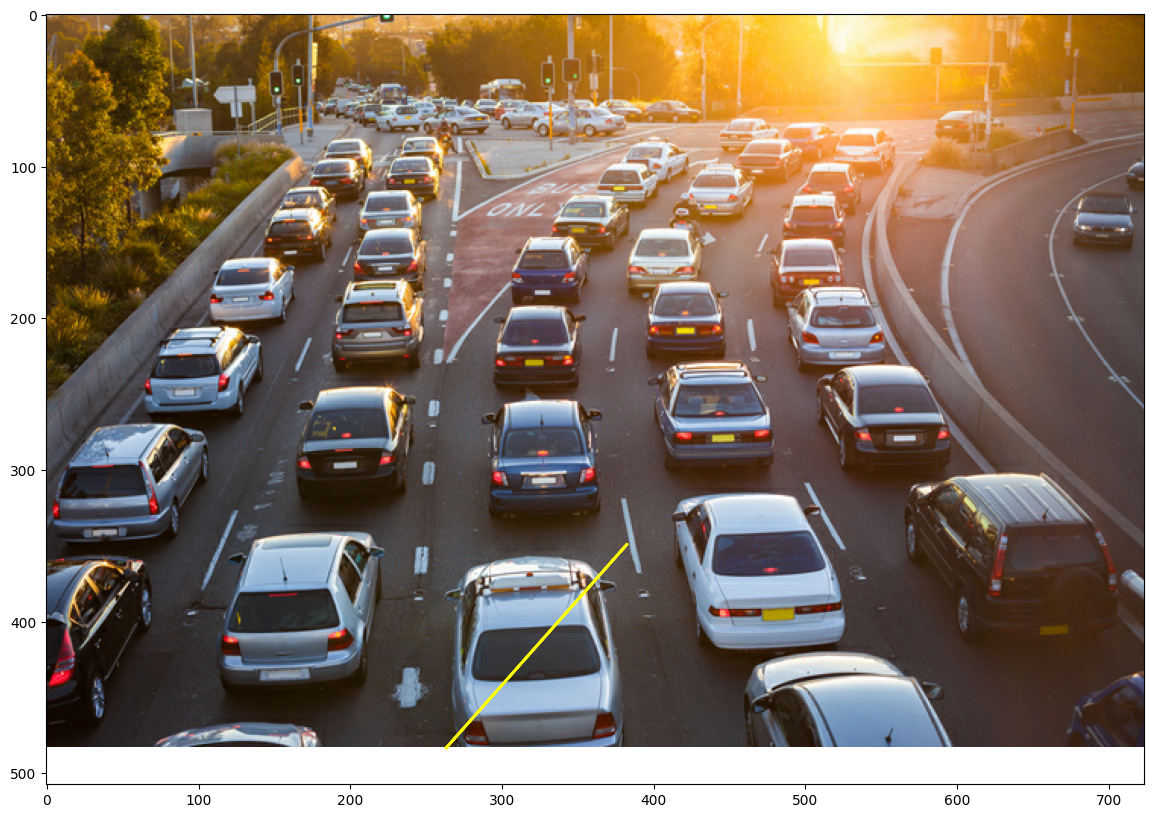

In [51]:
img_height, img_width = img.shape[0], img.shape[1]
obj_to_detect = 10
for i in range(min(obj_to_detect, boxes.shape[0])):
    if scores[i] >= 0.2:
        (ymax, xmin, ymin, xmax) = (boxes[i][0] * img_height, boxes[i][1] * img_width,
                                    boxes[i][2] * img_height, boxes[i][3] * img_width)
        print("{} : ({},{},{},{})".format(scores[i], ymax, xmin, ymin, xmax))

obj_to_detect = 10

plt.figure(figsize=(15, 10))
for i in range(min(obj_to_detect, boxes.shape[0])):
    if scores[i] >= 0.2:
        (ymax, xmin, ymin, xmax) = (boxes[i][0] * img_height, boxes[i][1] * img_width,
                                    boxes[i][2] * img_height, boxes[i][3] * img_width)
        plt.imshow(img)
        plt.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymax, ymax, ymin, ymin],
                 color='yellow', linewidth=2)
      
        class_name = labels[i].numpy().decode('utf-8')
        infer_score = int(scores[i].numpy() * 100)
